Libraries imported successfully!
Dataset loaded successfully!

--- First 5 Rows of the Dataset ---


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2020-07-06,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,FL,346XX,NaN,Other,Web,2020-07-06,Closed with explanation,Yes,NaN,3730948
1,2025-10-14,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information is missing that should be on the r...,NaN,NaN,"EQUIFAX, INC.",TX,75062,NaN,NaN,Web,2025-10-14,In progress,Yes,NaN,16558024
2,2025-10-10,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",GA,30341,NaN,NaN,Web,2025-10-10,In progress,Yes,NaN,16507707
3,2025-09-30,Mortgage,Conventional home mortgage,Trouble during payment process,"Escrow, taxes, or insurance",NaN,NaN,Ocwen Financial Corporation,TN,37411,NaN,NaN,Web,2025-09-30,In progress,Yes,NaN,16278077
4,2025-09-30,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",TX,77864,NaN,NaN,Web,2025-09-30,In progress,Yes,NaN,16261175



--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11454886 entries, 0 to 11454885
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1)

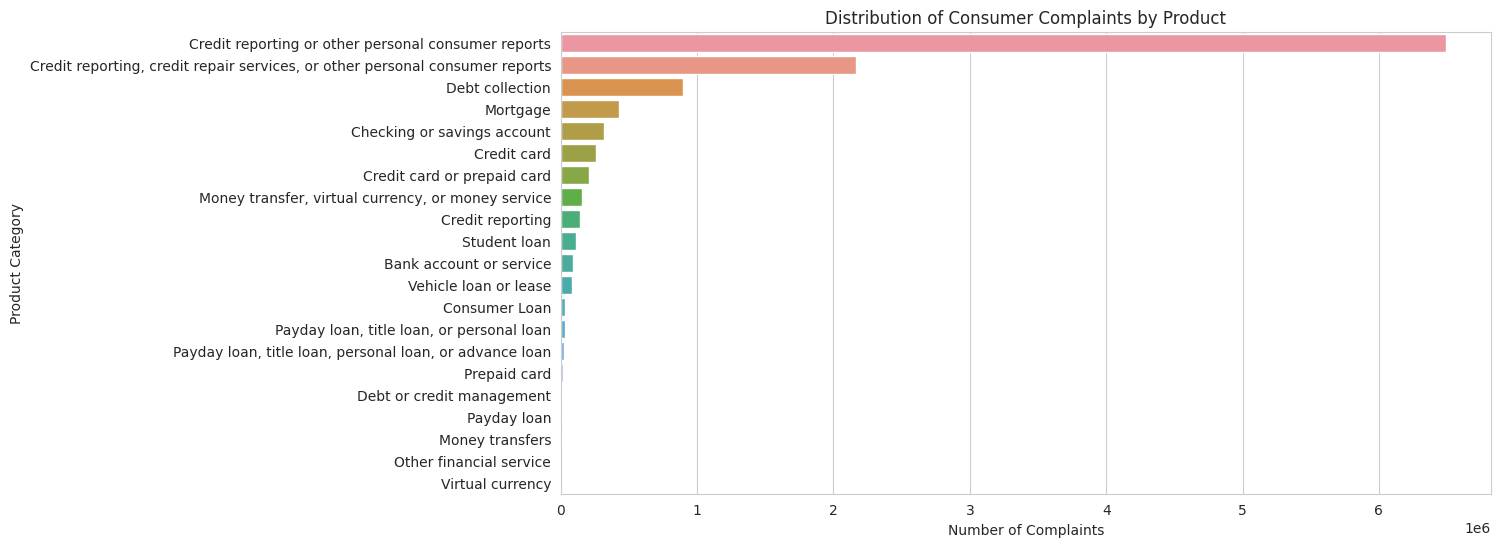

In [1]:
# Import necessary libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style('whitegrid')

print('Libraries imported successfully!')

# --- Load the Dataset ---
# Kaggle datasets are typically located in the '../input/' directory.
# The path will be '../input/<folder-name>/<file-name>.csv'
# Replace 'complaints/complaints.csv' if your folder/file name is different.
try:
    df = pd.read_csv('/kaggle/input/complaints/complaints.csv')
    print('Dataset loaded successfully!')
except FileNotFoundError:
    print('Dataset not found. Please check the file path.')
    # Create a dummy dataframe to avoid errors in subsequent cells if file not found
    df = pd.DataFrame()

# --- Initial Data Exploration ---
if not df.empty:
    # Display the first 5 rows of the dataframe
    print("\n--- First 5 Rows of the Dataset ---")
    display(df.head())

    # Display concise summary of the dataframe (columns, data types, non-null values)
    print("\n--- Dataset Information ---")
    df.info()

    # Display the shape of the dataset (number of rows, number of columns)
    print(f"\n--- Dataset Shape ---\nRows: {df.shape[0]}, Columns: {df.shape[1]}")

    # Check for missing values in each column
    print("\n--- Missing Values per Column ---")
    print(df.isnull().sum())

    # Focus on the relevant columns for this task: 'Product' and 'Consumer complaint narrative'
    relevant_cols = ['Product', 'Consumer complaint narrative']
    print(f"\n--- Value Counts for '{relevant_cols[0]}' Column ---")
    print(df['Product'].value_counts())

    # Plot the distribution of the 'Product' column
    plt.figure(figsize=(12, 6))
    sns.countplot(y='Product', data=df, order=df['Product'].value_counts().index)
    plt.title('Distribution of Consumer Complaints by Product')
    plt.xlabel('Number of Complaints')
    plt.ylabel('Product Category')
    plt.show()

In [3]:
# --- Step 2: Data Cleaning and Pre-processing (Corrected) ---

# Create a copy to avoid SettingWithCopyWarning
df_clean = df.copy()

# 1. Handle Missing Values
df_clean.dropna(subset=['Consumer complaint narrative'], inplace=True)
print(f"Shape after dropping null narratives: {df_clean.shape}")

# 2. Consolidate and Filter Product Categories
category_map = {
    'Credit reporting, credit repair services, or other personal consumer reports': 'Credit reporting, repair, or other',
    'Credit reporting or other personal consumer reports': 'Credit reporting, repair, or other',
    'Credit reporting': 'Credit reporting, repair, or other',
    'Debt collection': 'Debt collection',
    'Consumer Loan': 'Consumer Loan',
    'Mortgage': 'Mortgage'
}
df_clean['Product_Category'] = df_clean['Product'].map(category_map)
df_clean.dropna(subset=['Product_Category'], inplace=True)
print(f"Shape after filtering for target categories: {df_clean.shape}")
print("\n--- Distribution of Filtered Product Categories ---")
print(df_clean['Product_Category'].value_counts())


# 3. Create a Balanced Sample (CORRECTED LOGIC)
# Find the size of the smallest category to ensure we can sample from all groups.
min_sample_size = df_clean['Product_Category'].value_counts().min()
print(f"\nSmallest category has {min_sample_size} records. Using this for balanced sampling.")

# Take a balanced sample of size `min_sample_size` from each category.
df_sampled = df_clean.groupby('Product_Category', group_keys=False).apply(
    lambda x: x.sample(n=min_sample_size, random_state=42)
)

print(f"\n--- Working with a balanced sample of {df_sampled.shape[0]} records ---")
print(df_sampled['Product_Category'].value_counts())


# --- Text Pre-processing ---
# This part remains the same as before.

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK data packages if you haven't already
try:
    stopwords.words('english')
except LookupError:
    print("Downloading NLTK data packages...")
    nltk.download('stopwords')
    nltk.download('wordnet')
    nltk.download('omw-1.4') # Open Multilingual Wordnet
    print("Downloads complete.")

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

print("\nStarting text pre-processing on the sampled data (this may take a minute)...")
df_sampled['processed_narrative'] = df_sampled['Consumer complaint narrative'].apply(preprocess_text)
print("Text pre-processing complete!")

# Display a comparison of original vs. processed text
print("\n--- Example of Text Pre-processing ---")
pd.set_option('display.max_colwidth', None)
display(df_sampled[['Consumer complaint narrative', 'processed_narrative']].head())

Shape after dropping null narratives: (3404774, 18)
Shape after filtering for target categories: (2785051, 19)

--- Distribution of Filtered Product Categories ---
Product_Category
Credit reporting, repair, or other    2269989
Debt collection                        370839
Mortgage                               134762
Consumer Loan                            9461
Name: count, dtype: int64

Smallest category has 9461 records. Using this for balanced sampling.


/tmp/ipykernel_37/914321308.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df_clean.groupby('Product_Category', group_keys=False).apply(



--- Working with a balanced sample of 37844 records ---
Product_Category
Consumer Loan                         9461
Credit reporting, repair, or other    9461
Debt collection                       9461
Mortgage                              9461
Name: count, dtype: int64

Starting text pre-processing on the sampled data (this may take a minute)...
Text pre-processing complete!

--- Example of Text Pre-processing ---


,Consumer complaint narrative,processed_narrative
7727896,"I leased XXXX Nissans on XXXX/XXXX/16. We then went back on XXXX/XXXX/16 with my daughter who purchased the XXXX Nissan. Was told at the time of getting the lease, the payment would be due in XXXX. In XXXX, I got the bill for XXXX of the leased vehicles and the purchased vehicle. I called inquiring about the other leased vehicle. Was told at that time, nothing had been received for financing from the dealership. I was told they would remove any late fees if they were charged. I called the dealer twice about the paperwork. Never got a call back. Then on XXXX XXXX, I got the bill for the leased vehicle with a due date of XXXX XXXX ( bill came 2 days after due date ). There were late fees assessed. I called and was told they would remove the late fees, but I needed to pay for XXXX and XXXX. I was also told I was reported the credit bureau for XXXX because I did n't pay. I did n't pay because they did n't even have the info in for XXXX from the dealership! They said they would remove the credit bureau hit on XXXX. I sent the payment for XXXX and XXXX on XXXX ( day I got the very first bill ). I inquired because at that time, the bill did n't even get to me until 2 days AFTER XXXX payment. other XXXX cars have been fine, just this XXXX car. The other XXXX I paid in XXXX no issues, and was not late. On XXXX XXXX, I get yet ANOTHER call about late payments. I had just called on 5 days earlier and was assured they were taking care of this issue! I 've been telling Nissan since XXXX I owed them money. Yes, I told THEM I owed them. But now, I 'm getting late charges and being harassed about payments. The paperwork was late from the dealership. This was not an error on my part.",leased xxxx nissan xxxxxxxx went back xxxxxxxx daughter purchased xxxx nissan told time getting lease payment would due xxxx xxxx got bill xxxx leased vehicle purchased vehicle called inquiring leased vehicle told time nothing received financing dealership told would remove late fee charged called dealer twice paperwork never got call back xxxx xxxx got bill leased vehicle due date xxxx xxxx bill came day due date late fee assessed called told would remove late fee needed pay xxxx xxxx also told reported credit bureau xxxx nt pay nt pay nt even info xxxx dealership said would remove credit bureau hit xxxx sent payment xxxx xxxx xxxx day got first bill inquired time bill nt even get day xxxx payment xxxx car fine xxxx car xxxx paid xxxx issue late xxxx xxxx get yet another call late payment called day earlier assured taking care issue telling nissan since xxxx owed money yes told owed getting late charge harassed payment paperwork late dealership error part
9941104,CHASE AUTO MADE A HARD INQUIRE ON MY CREDIT REPORT WITHOUT MY CONSENT,chase auto made hard inquire credit report without consent
5566338,I paid this loan off in XXXX 2015. They processed a payment after the loan was taken out. I asked for a refund of the payment. I ended up receiving the refund through XXXX XXXX XXXX. I have spoken to several different people and even sent my banking statement showing I never received a refund from them. The refuse to clear the account and it is negatively affecting my credit. I was hung up on 3 times while calling to speak to someone. I have someone arguing with me after I sent in the documentation of the what she asked. I would like this situation resolved immediately.,paid loan xxxx processed payment loan taken asked refund payment ended receiving refund xxxx xxxx xxxx spoken several different people even sent banking statement showing never received refund refuse clear account negatively affecting credit hung time calling speak someone someone arguing sent documentation asked would like situation resolved immediately
7016214,"I financed an auto loan through my local XXXX dealer. I had automatic payments taken from my checking account each month ; the checks were taken by "" JP Morgan Chase '' for the auto lo

Training set size: 30275
Test set size: 7569

Text data successfully converted to TF-IDF vectors.
Shape of TF-IDF training matrix: (30275, 5000)

Training the Naive Bayes model...
Model training complete!

--- Model Evaluation ---
Accuracy: 0.8508

Classification Report:
                                    precision    recall  f1-score   support

                     Consumer Loan       0.83      0.87      0.85      1892
Credit reporting, repair, or other       0.82      0.87      0.85      1892
                   Debt collection       0.82      0.72      0.77      1893
                          Mortgage       0.92      0.94      0.93      1892

                          accuracy                           0.85      7569
                         macro avg       0.85      0.85      0.85      7569
                      weighted avg       0.85      0.85      0.85      7569


Confusion Matrix:


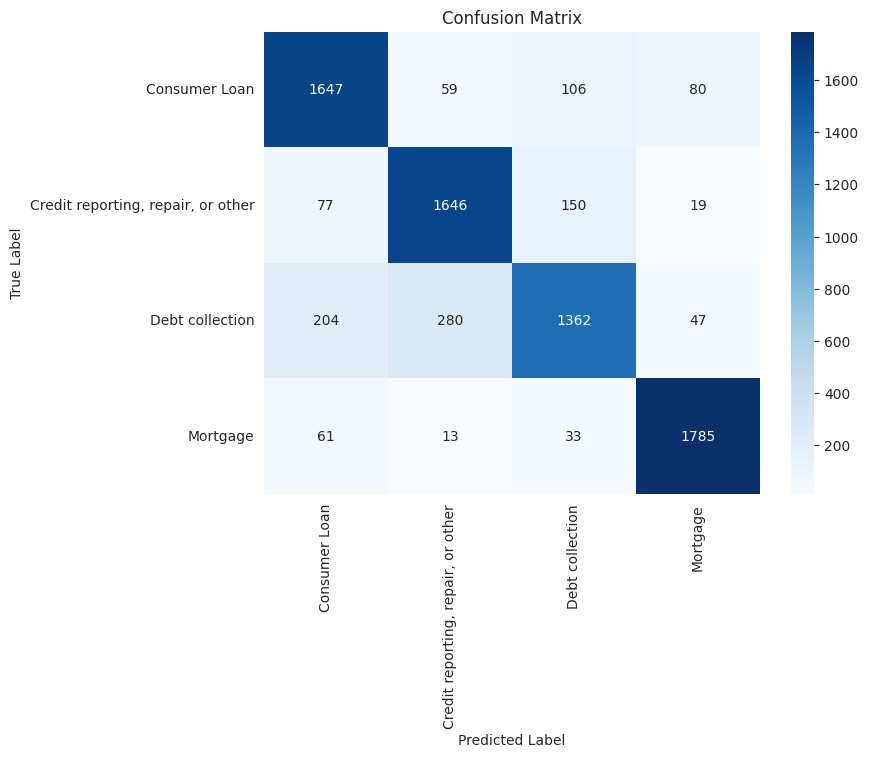

In [4]:
# --- Step 3: Model Selection, Training, and Evaluation ---

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Define Features (X) and Target (y)
X = df_sampled['processed_narrative']
y = df_sampled['Product_Category']

# 2. Split the data into training and testing sets
# We'll use 80% for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

# 3. Create TF-IDF Vectorizer
# This will convert our text data into numerical vectors.
vectorizer = TfidfVectorizer(max_features=5000) # Limit to the top 5000 features/words

# Fit the vectorizer on the training data and transform it
X_train_tfidf = vectorizer.fit_transform(X_train)

# Only transform the test data (using the vocabulary from the training data)
X_test_tfidf = vectorizer.transform(X_test)

print("\nText data successfully converted to TF-IDF vectors.")
print(f"Shape of TF-IDF training matrix: {X_train_tfidf.shape}")

# 4. Train a Multinomial Naive Bayes Model
# Initialize the model
nb_model = MultinomialNB()

print("\nTraining the Naive Bayes model...")
# Train the model on the TF-IDF transformed training data
nb_model.fit(X_train_tfidf, y_train)
print("Model training complete!")

# 5. Model Evaluation
print("\n--- Model Evaluation ---")
# Make predictions on the test set
y_pred = nb_model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Display a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Optional: Display Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
# Use seaborn for a prettier confusion matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=nb_model.classes_,
            yticklabels=nb_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

--- Training a Linear Support Vector Machine (SVM) Model ---
Training the SVM model...
Model training complete!

--- SVM Model Evaluation ---
Accuracy: 0.8795

Classification Report:
                                    precision    recall  f1-score   support

                     Consumer Loan       0.89      0.88      0.89      1892
Credit reporting, repair, or other       0.86      0.87      0.87      1892
                   Debt collection       0.82      0.83      0.82      1893
                          Mortgage       0.95      0.94      0.94      1892

                          accuracy                           0.88      7569
                         macro avg       0.88      0.88      0.88      7569
                      weighted avg       0.88      0.88      0.88      7569


Confusion Matrix:


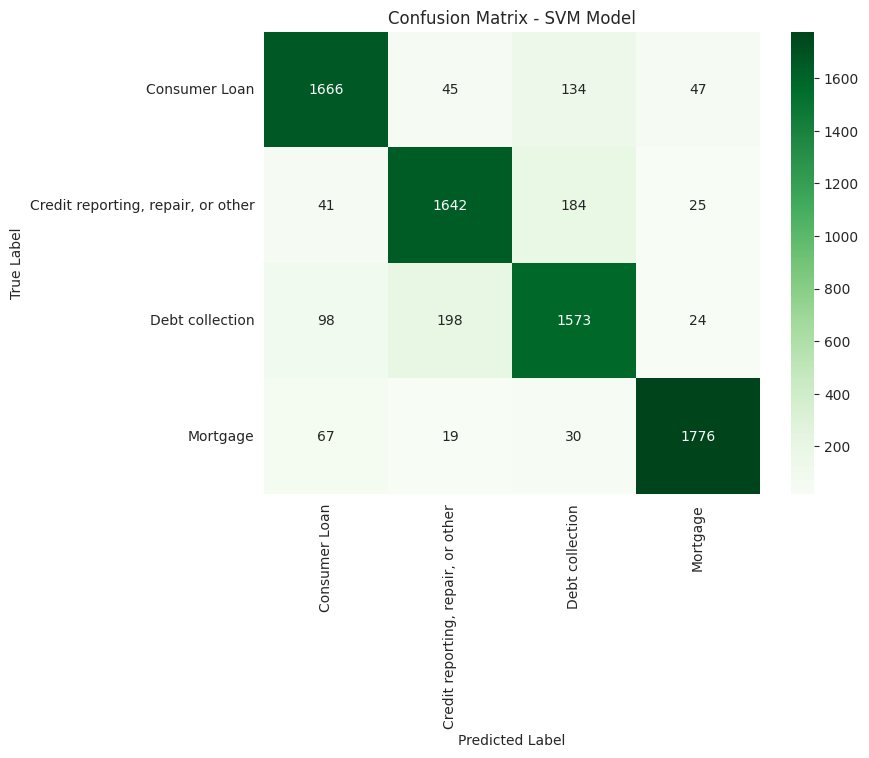

In [5]:
# --- Step 4: Train a Second Model for Comparison ---

from sklearn.svm import LinearSVC

print("--- Training a Linear Support Vector Machine (SVM) Model ---")

# 1. Initialize the LinearSVC model
svm_model = LinearSVC(random_state=42, dual=False) # dual=False is recommended when n_samples > n_features

# 2. Train the model on the same TF-IDF data
print("Training the SVM model...")
svm_model.fit(X_train_tfidf, y_train)
print("Model training complete!")

# 3. Model Evaluation
print("\n--- SVM Model Evaluation ---")
# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test_tfidf)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy_svm:.4f}")

# Display a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

# Display Confusion Matrix for the SVM model
print("\nConfusion Matrix:")
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens',
            xticklabels=svm_model.classes_,
            yticklabels=svm_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - SVM Model')
plt.show()

In [6]:
# --- Step 6: Prediction on a New Complaint ---

# Our two key components are the trained vectorizer and the trained SVM model
# vectorizer: Knows the vocabulary from the training data.
# svm_model: Knows the patterns learned from the training data.

# Example new complaint text
new_complaint = "I have been trying to dispute a charge on my credit card for months. The bank keeps telling me they are investigating but nothing happens. This is affecting my credit score negatively and I am frustrated with the lack of response."

# 1. Pre-process the new text using the same function as before
processed_complaint = preprocess_text(new_complaint)
print(f"Original complaint: '{new_complaint}'")
print(f"Processed complaint: '{processed_complaint}'\n")


# 2. Vectorize the processed text
# IMPORTANT: We use .transform() ONLY. We do not .fit() again,
# as we need to use the vocabulary learned from our original training data.
vectorized_complaint = vectorizer.transform([processed_complaint])


# 3. Make a prediction using our best model (SVM)
prediction = svm_model.predict(vectorized_complaint)

print(f"🎉 The model predicts the category is: {prediction[0]}")

Original complaint: 'I have been trying to dispute a charge on my credit card for months. The bank keeps telling me they are investigating but nothing happens. This is affecting my credit score negatively and I am frustrated with the lack of response.'
Processed complaint: 'trying dispute charge credit card month bank keep telling investigating nothing happens affecting credit score negatively frustrated lack response'

🎉 The model predicts the category is: Consumer Loan
